In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Convert object to numeric value
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [10]:
df["TotalCharges"].dtype

dtype('float64')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.drop(columns=["customerID"], inplace=True)

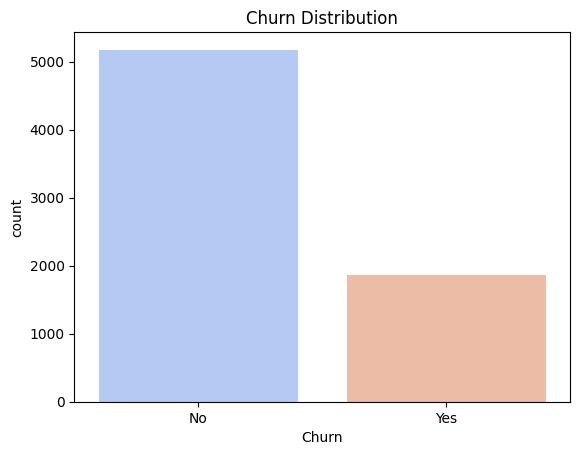

In [15]:
sns.countplot(x=df['Churn'], palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

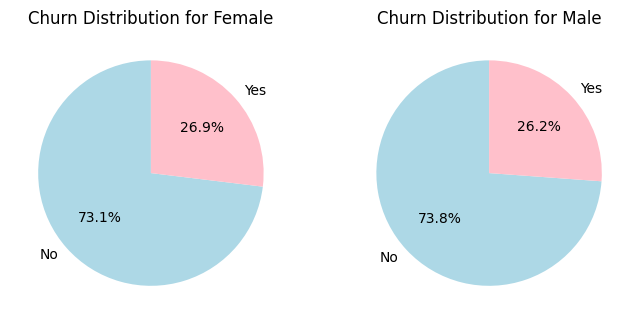

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Get counts for each gender
for i, gender in enumerate(df["gender"].unique()):
    gender_data = df[df["gender"] == gender]["Churn"].value_counts()
    axes[i].pie(gender_data, labels=gender_data.index, autopct="%1.1f%%", colors=['lightblue','pink'], startangle=90)
    axes[i].set_title(f"Churn Distribution for {gender}")

plt.show()

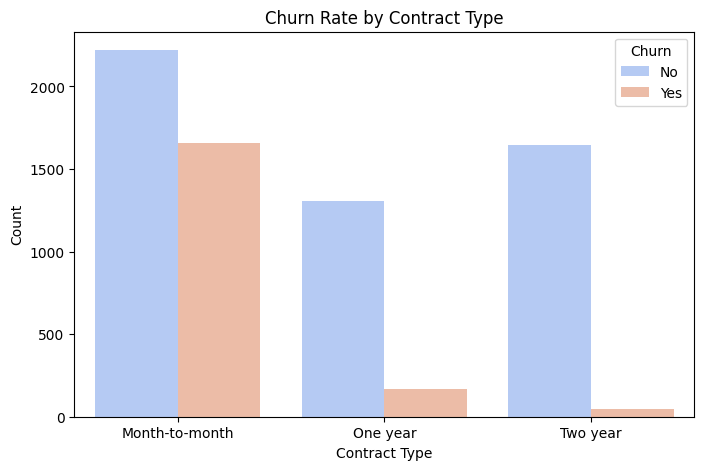

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

Customers with Month-to-Month contracts churn more often than those with Yearly contracts.
This suggests that customers with long-term contracts are more likely to stay.

In [18]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

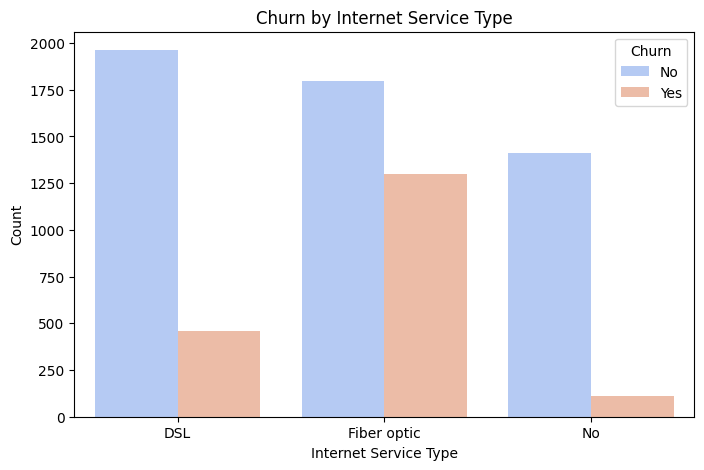

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()

Customers using Fiber Optic have a higher churn rate compared to DSL and No Internet.
Maybe Fiber Optic service has issues (price, reliability, customer satisfaction).

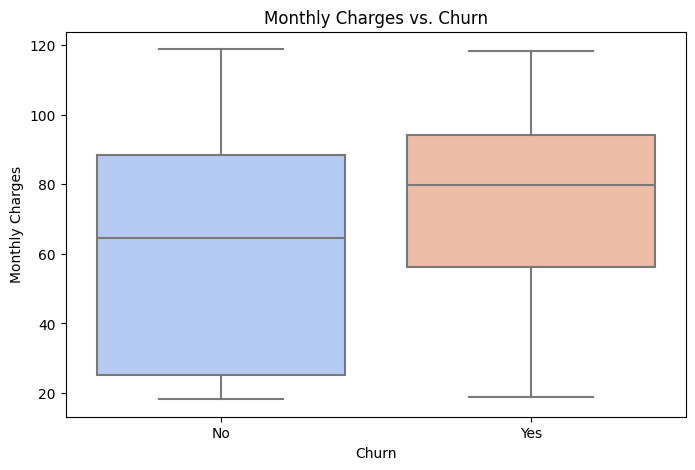

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

Churned customers tend to have higher monthly charges.

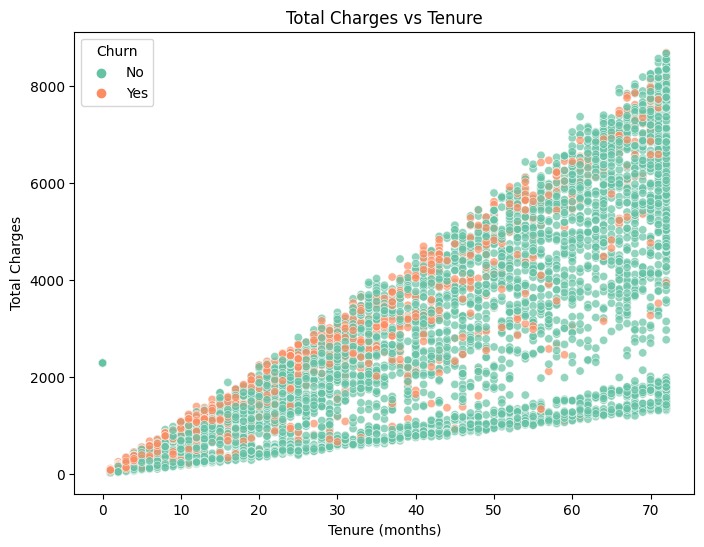

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["tenure"], y=df["TotalCharges"], hue=df["Churn"], palette="Set2", alpha=0.7)
plt.title("Total Charges vs Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges")
plt.show()

Customers who stayed longer (higher tenure) generally have higher total charges.
Customers with low tenure and low charges tend to churn more.

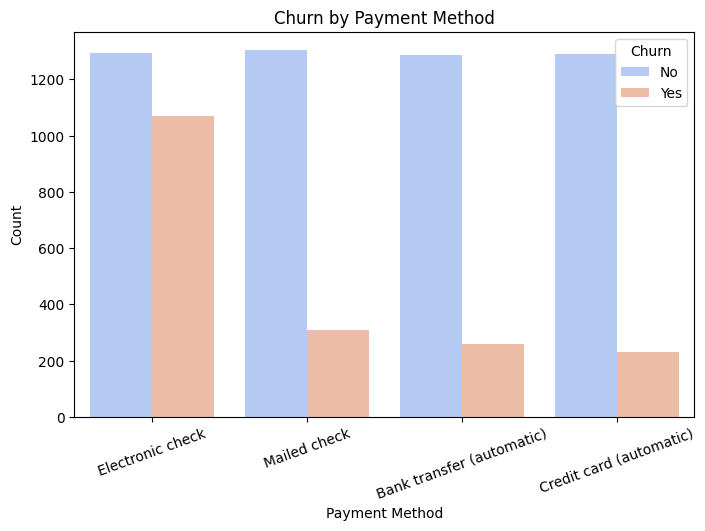

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Payment Method")
plt.xticks(rotation=20)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

C:\Users\NISHITA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


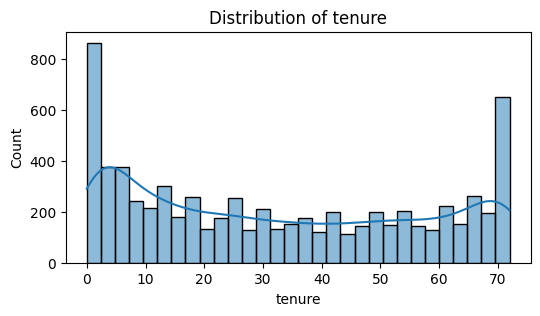

C:\Users\NISHITA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


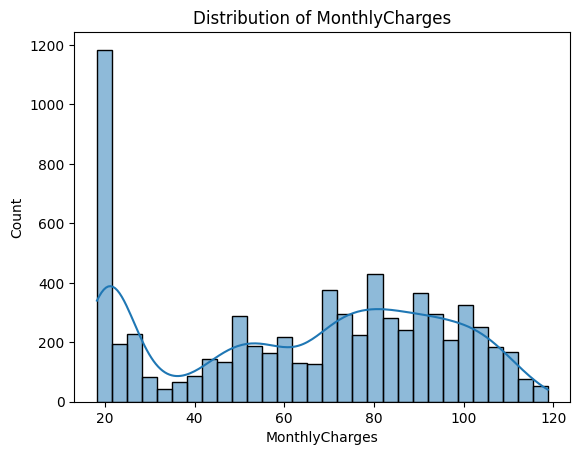

C:\Users\NISHITA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


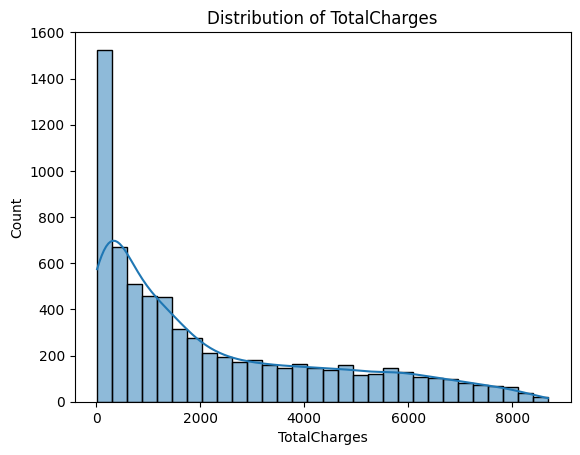

In [23]:
#Plot distributions of tenure, MonthlyCharges, and TotalCharges
plt.figure(figsize=(6, 3))

for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    sns.histplot(df[col], bins=30, kde=True)  
    plt.title(f"Distribution of {col}")
    plt.show() 

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

### Data Preprocessing

In [24]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_cols = [col for col in df.columns if col not in num_cols + ["Churn"]]

In [25]:
# One-Hot Encoding Categorical Variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [26]:
# Convert Target Variable ('Churn') to Binary (Yes → 1, No → 0)
df_encoded["Churn"] = df_encoded["Churn"].map({"Yes": 1, "No": 0})

In [27]:
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((5634, 30), (1409, 30))

In [29]:
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [30]:
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_weighted')
    cv_scores.append(scores.mean())

# Find the best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K: {best_k}")

Best K: 19


### Different Models Training and Evaluation

##### KNN

In [31]:
knn_model = KNeighborsClassifier(n_neighbors = 19) 
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)

print("KNN accuracy:",accuracy_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN accuracy: 0.7764371894960965

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.56      0.57       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.77      1409


Confusion Matrix:
 [[885 150]
 [165 209]]


##### Logistic Regression

In [32]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
accuracy_lr = lr.score(X_test,y_test)

print("Logistic Regression accuracy:",accuracy_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression accuracy: 0.7984386089425124

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[920 115]
 [169 205]]


##### Support Vector Classification(SVC)

In [33]:
svc = SVC(random_state = 42)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = svc.score(X_test,y_test)

print("SVM accuracy:",accuracy_svc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVM accuracy: 0.7892122072391767

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
 [[930 105]
 [192 182]]


##### Random Forest

In [34]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7856635911994322

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409


Confusion Matrix:
 [[923 112]
 [190 184]]


##### XGBoost

In [35]:
class_counts = y_train.value_counts()
ratio = class_counts[0] / class_counts[1]

xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, random_state = 42, scale_pos_weight=ratio)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7480482611781405

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409


Confusion Matrix:
 [[756 279]
 [ 76 298]]


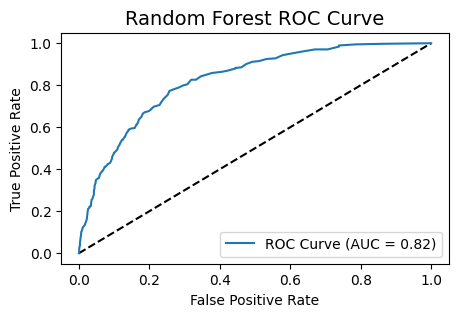

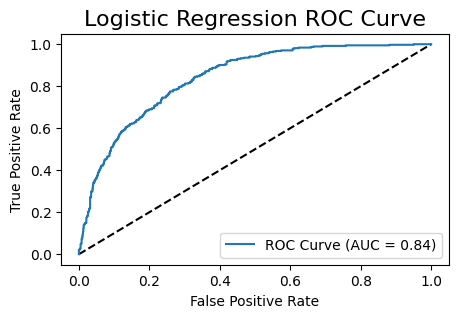

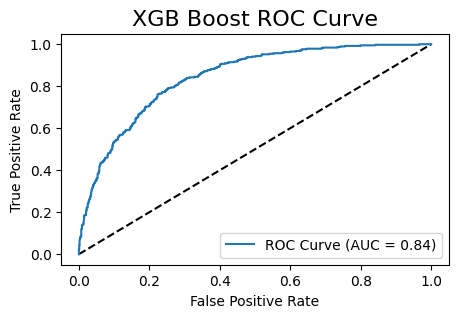

In [36]:
#Let's plot the ROC Curve to to check the performance of models.

plt.figure(figsize=(5, 3))
y_pred_rfprob = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rfprob)
roc_auc_rf = roc_auc_score(y_test, y_pred_rfprob) 
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=14)
plt.legend(loc="lower right")
plt.show();

plt.figure(figsize=(5, 3))
y_pred_lrprob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lrprob)
roc_auc_lr = roc_auc_score(y_test, y_pred_lrprob) 
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.legend(loc="lower right")
plt.show();

plt.figure(figsize=(5, 3))
y_pred_xgbprob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbprob)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgbprob) 
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Boost ROC Curve',fontsize=16)
plt.legend(loc="lower right")
plt.show();

Higher AUC means a better model in distinguishing between classes. 
Since LR and XGB both have the highest AUC (0.84), they are better at separating churn and non-churn customers compared to Random Forest.

In [37]:
#Let's now predict the final model based on the highest majority of voting and check it's score.

clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = SVC(probability=True)
clf4 = RandomForestClassifier()
clf5 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('knn', clf1), ('lr', clf2), ('svc', clf3), ('rf', clf4), ('xgb', clf5)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Find the best model name (highest accuracy in individual models)
models = {"KNN": clf1, "Logistic Regression": clf2, "SVC": clf3, "Random Forest": clf4, "XGBoost": clf5}
best_model_name = max(models, key=lambda model: accuracy_score(y_test, models[model].fit(X_train, y_train).predict(X_test)))

print("\nBest Individual Model:", best_model_name)
print("Final Accuracy Score:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)



Best Individual Model: Logistic Regression
Final Accuracy Score: 0.8005677785663591

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[927 108]
 [173 201]]


### RESULT
In this project, Logistic Regression emerged as the best-performing model with an accuracy of 80%. The model achieved:
* Precision (Class 1 - Churn): 65%
* Recall (Class 1 - Churn): 54%
* F1-score (Class 1 - Churn): 59%
<br>
The confusion matrix shows that the model correctly predicted 925 non-churn cases and 201 churn cases, but misclassified 110 non-churn as churn and 173 churn as non-churn.
While the model performs well overall, it struggles with churn recall, meaning some actual churn cases are missed. Future improvements could include feature engineering, hyperparameter tuning, or trying more advanced models.
This project demonstrates a solid approach to customer churn prediction, providing valuable insights for reducing churn.

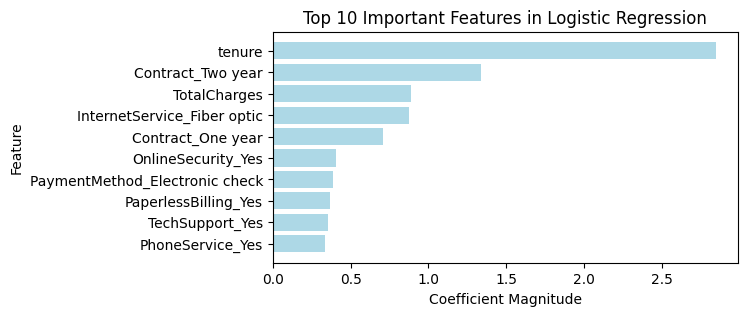

In [38]:
# Feature importance for logistic regression (absolute coefficients)

feature_importance = np.abs(lr.coef_)[0]
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6, 3))
plt.barh(feat_imp_df["Feature"][:10], feat_imp_df["Importance"][:10], color="lightblue")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Top 10 Important Features in Logistic Regression")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

In [39]:
# Final Actual and Prediction file
results_df = pd.DataFrame({
    'Actual Churn': y_test.values,
    'Predicted Churn': predictions
})
results_df.to_csv("churn_predictions.csv", index=False)
print("File saved as churn_predictions.csv")

File saved as churn_predictions.csv
